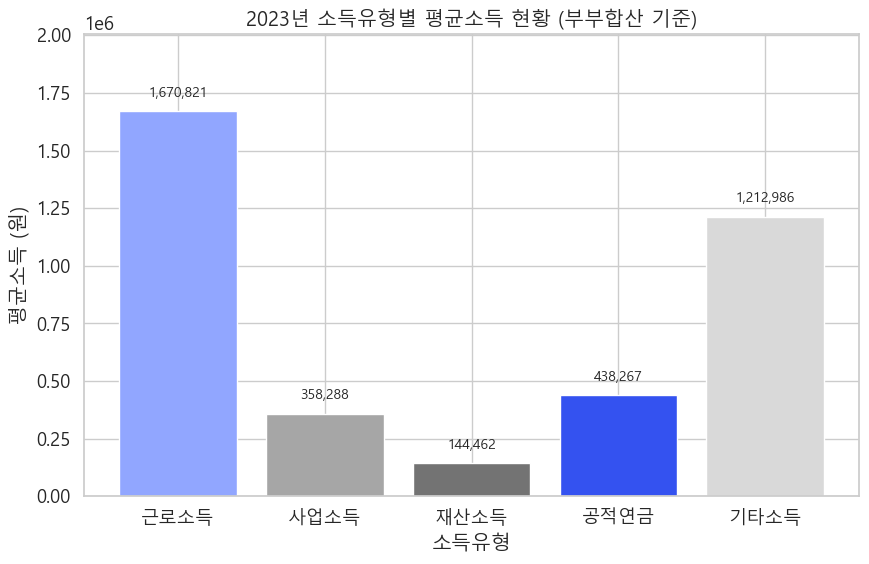

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 파일 불러오기
file_path = 'data/기초연금 수급자 연도별, 소득유형별 평균소득(부부합산기준)_전처리.csv'
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()

# 소득유형 컬럼 지정 및 숫자형 변환
income_columns = ['근로소득', '사업소득', '재산소득', '공적연금', '기타소득']
for col in income_columns:
    df[col] = df[col].astype(str).str.replace(',', '').astype(float)

# 최신 연도의 데이터 선택 (예: 2022)
latest_year = df['연도'].max()
latest_df = df[df['연도'] == latest_year].iloc[0]

# 데이터 준비
income_values = [latest_df[col] for col in income_columns]

# 시각화
sns.set(style='whitegrid', font='Malgun Gothic', font_scale=1.2)
plt.figure(figsize=(10, 6))
bars = plt.bar(income_columns, income_values, color = ['#91A6FF', '#a6a6a6', '#737373', '#3452F0', '#d9d9d9'])

# 값 라벨 추가
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 50000, f"{int(height):,}", ha='center', va='bottom', fontsize=10)

plt.title(f'{int(latest_year)}년 소득유형별 평균소득 현황 (부부합산 기준)')
plt.ylabel('평균소득 (원)')
plt.xlabel('소득유형')
plt.ylim(0, max(income_values) * 1.2)
plt.show()


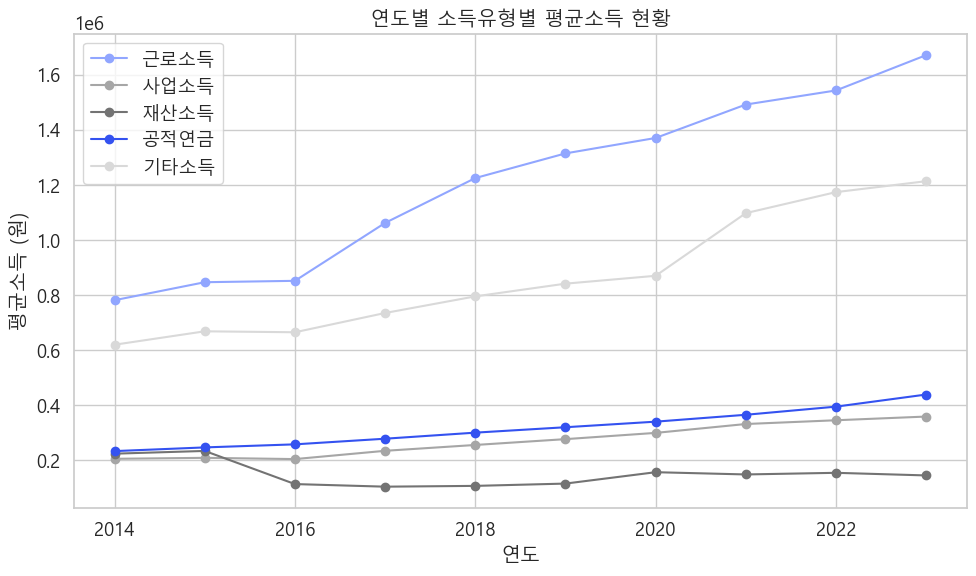

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일 불러오기
file_path = 'data/기초연금 수급자 연도별, 소득유형별 평균소득(부부합산기준)_전처리.csv'
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()

# 소득유형 컬럼 지정 및 숫자형 변환
income_columns = ['근로소득', '사업소득', '재산소득', '공적연금', '기타소득']
for col in income_columns:
    df[col] = df[col].astype(str).str.replace(',', '').astype(float)

# 컬러 설정
colors = ['#91A6FF', '#a6a6a6', '#737373', '#3452F0', '#d9d9d9']

# 시각화
plt.figure(figsize=(10, 6))
for idx, col in enumerate(income_columns):
    plt.plot(df['연도'], df[col], marker='o', label=col, color=colors[idx])

plt.title('연도별 소득유형별 평균소득 현황')
plt.xlabel('연도')
plt.ylabel('평균소득 (원)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
